In [2]:
import numpy as np
import matplotlib.pyplot as plt

# add the path to my packages to system paths so they can be imported
import sys
# sys.path.append('/home/yasamanparhizkar/Documents/yorku/01_thesis/code/my_packages')
sys.path.append('F:\MAScThesis\code\my_packages')

import my_first_feature_extractor as fe
import my_simgraph_04 as sg

# Test jointly with the SIFT package

## Download mnist and extract SIFT descriptors

In [3]:
# define parameters of feature extraction block
data_params = {'name': 'mnist'}
allocation_params = {'portion': 0.005, 'fracs': [0.6, 0.4], 'seed': 0}
sift_params = {} # all default
kpnum_params = {'min': 2, 'max': 2}
normalize = True
return_imgs = True
save = False
savepath = '../../../data/fe_pt/'
img_sz = (28, 28)

# extract features from mnist images
num_train, num_val, train_data, val_data = \
fe.xsift_from_data(data_params, allocation_params, sift_params, kpnum_params, \
                   normalize, return_imgs, save, savepath, img_sz)

In [4]:
train_des = train_data['des']
train_lbls = train_data['lbls']
train_imgs = train_data['imgs']
train_kp = train_data['kp']

val_des = val_data['des']
val_lbls = val_data['lbls']
val_imgs = val_data['imgs']
val_kp = val_data['kp']

In [5]:
pers = fe.class_percentages(train_lbls, [0, 1], fe.train_times)
for i in range(2):
    print('{:.2f}% of the training data is class {}, corresponding to {} data points'\
          .format(pers[i], i, round(pers[i]*num_train/100)))

print('Computing these statistics took {:.3f} ms.\n'.format(fe.train_times['class_percentages']*1000))

pers = fe.class_percentages(val_lbls, [0, 1], fe.val_times)
for i in range(2):
    print('{:.2f}% of the validation data is class {}, corresponding to {} data points'\
          .format(pers[i], i, round(pers[i]*num_val/100)))

print('Computing these statistics took {:.3f} ms.'.format(fe.val_times['class_percentages']*1000))

39.02% of the training data is class 0, corresponding to 16 data points
60.98% of the training data is class 1, corresponding to 25 data points
Computing these statistics took 0.000 ms.

50.00% of the validation data is class 0, corresponding to 13 data points
50.00% of the validation data is class 1, corresponding to 13 data points
Computing these statistics took 0.000 ms.


Some training images:
Drawing these images took 925.500 ms.


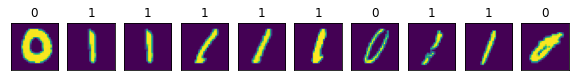

In [6]:
print("Some training images:")
fe.vis_random_imgs(train_imgs, train_lbls, 10, 1, 0, img_sz, fe.train_times)

print('Drawing these images took {:.3f} ms.'.format(fe.train_times['vis_random_imgs']*1000))

Some training images and their keypoints:
Drawing these images took 59.876 ms.


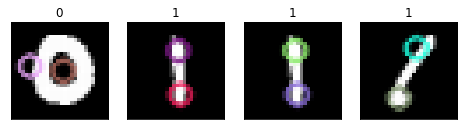

In [7]:
print("Some training images and their keypoints:")
fe.visualize_kps(train_imgs, train_kp, train_lbls, 4, 1, 0, img_sz, False, fe.train_times)

print('Drawing these images took {:.3f} ms.'.format(fe.train_times['visualize_kps']*1000))

## Fit similarity graph to data

In [8]:
np.random.seed(0)
f_sz = train_des.shape[1]
B0 = 0.0001 * np.random.random_sample((f_sz,f_sz))

opt_params = { 'epsilon0':1, 'epsilon_decay':0.5, 'epsilon_jump': 2, \
              'num_its':16, 'check_freq':2, 'print_checks':True, 'Theta0':B0, \
              'force_all_its': False, 'threshold': 0.01}

flex_B, flex_stats = sg.fit_graph(train_des, train_lbls, opt_params, seed = 0)

Number of training datapoints: 41
Number of features for each point: 256
mu = 0
SG edges are: [(0, 3), (0, 5), (0, 7), (0, 9), (0, 10), (0, 11), (0, 13), (0, 16), (0, 17), (0, 19), (0, 20), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 29), (0, 31), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (1, 3), (1, 5), (1, 7), (1, 9), (1, 10), (1, 11), (1, 13), (1, 16), (1, 17), (1, 19), (1, 20), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 29), (1, 31), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (2, 3), (2, 5), (2, 7), (2, 9), (2, 10), (2, 11), (2, 13), (2, 16), (2, 17), (2, 19), (2, 20), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 29), (2, 31), (2, 35), (2, 36), (2, 37), (2, 38), (2, 39), (2, 40), (3, 4), (3, 6), (3, 8), (3, 12), (3, 14), (3, 15), (3, 18), (3, 21), (3, 28), (3, 30), (3, 32), (3, 33), (3, 34), (4, 5), (4, 7), (4, 9), (4, 10), (4, 11), (4, 13), (4, 16), (4, 17), (4, 19), (4, 20), (4, 22), (4, 23), (4, 24), (4, 25), (4, 2

In [9]:
opt_params = { 'epsilon0':1, 'epsilon_decay':0.5, 'epsilon_jump': 2, \
              'num_its':16, 'check_freq':2, 'print_checks':True, 'Theta0':B0, \
              'force_all_its': True, 'threshold': 0.01}

forced_B, forced_stats = sg.fit_graph(train_des, train_lbls, opt_params, seed = 0)

Number of training datapoints: 41
Number of features for each point: 256
mu = 0
SG edges are: [(0, 3), (0, 5), (0, 7), (0, 9), (0, 10), (0, 11), (0, 13), (0, 16), (0, 17), (0, 19), (0, 20), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 29), (0, 31), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (1, 3), (1, 5), (1, 7), (1, 9), (1, 10), (1, 11), (1, 13), (1, 16), (1, 17), (1, 19), (1, 20), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 29), (1, 31), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (2, 3), (2, 5), (2, 7), (2, 9), (2, 10), (2, 11), (2, 13), (2, 16), (2, 17), (2, 19), (2, 20), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 29), (2, 31), (2, 35), (2, 36), (2, 37), (2, 38), (2, 39), (2, 40), (3, 4), (3, 6), (3, 8), (3, 12), (3, 14), (3, 15), (3, 18), (3, 21), (3, 28), (3, 30), (3, 32), (3, 33), (3, 34), (4, 5), (4, 7), (4, 9), (4, 10), (4, 11), (4, 13), (4, 16), (4, 17), (4, 19), (4, 20), (4, 22), (4, 23), (4, 24), (4, 25), (4, 2

Text(0.5, 1.0, 'Time spent to find a valid stepsize in each iteration')

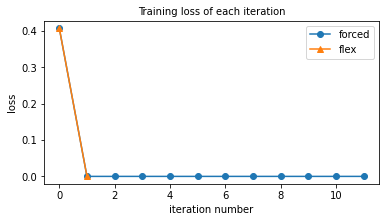

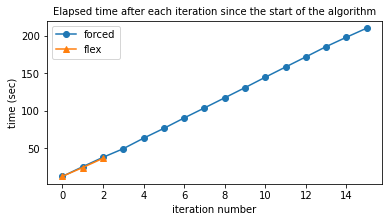

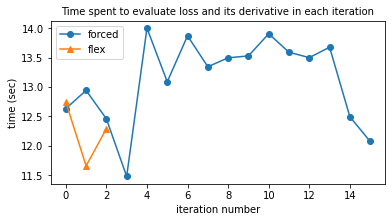

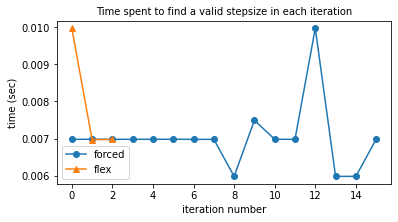

In [10]:
# Some informative figures to compare forced and flexible time complexity
plt.figure(figsize=(6,3))
plt.plot(forced_stats['train_losss'], marker='o')
plt.plot(flex_stats['train_losss'], marker='^')
plt.legend(['forced', 'flex'])
plt.xlabel('iteration number')
plt.ylabel('loss')
plt.title('Training loss of each iteration', fontsize=10)

plt.figure(figsize=(6,3))
plt.plot(forced_stats['it_times'], marker='o')
plt.plot(flex_stats['it_times'], marker='^')
plt.legend(['forced', 'flex'])
plt.xlabel('iteration number')
plt.ylabel('time (sec)')
plt.title('Elapsed time after each iteration since the start of the algorithm', fontsize=10)

plt.figure(figsize=(6,3))
plt.plot(forced_stats['eval_times'], marker='o')
plt.plot(flex_stats['eval_times'], marker='^')
plt.legend(['forced', 'flex'])
plt.xlabel('iteration number')
plt.ylabel('time (sec)')
plt.title('Time spent to evaluate loss and its derivative in each iteration', fontsize=10)

plt.figure(figsize=(6,3))
plt.plot(forced_stats['stepsizeloop_times'], marker='o')
plt.plot(flex_stats['stepsizeloop_times'], marker='^')
plt.legend(['forced', 'flex'])
plt.xlabel('iteration number')
plt.ylabel('time (sec)')
plt.title('Time spent to find a valid stepsize in each iteration', fontsize=10)

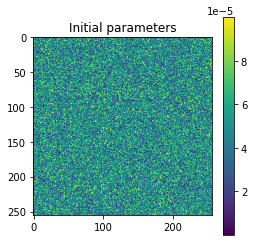

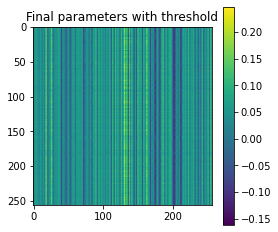

In [11]:
sg.display_matrix(B0, 'Initial parameters')
sg.display_matrix(flex_B, 'Final parameters with threshold')

In [12]:
W = sg.create_W(flex_B)
W_ord, origin, cats = sg.in_order(W, train_lbls)
sg.display_matrix(W, 'Final W')
sg.display_matrix(W_ord, 'Ordered W')

TypeError: create_W() missing 1 required positional argument: 'F'

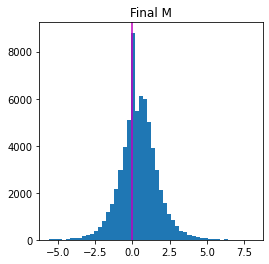

In [13]:
M = flex_B.T @ flex_B
sg.hist_of_entries(M, 50, lx=None, lbl='Final M', zeroline=True, peakline=False)

## Estimate validation labels

In [18]:
acc, y_est, t = sg.get_acc(flex_B, train_des, train_lbls, val_des, val_lbls)

print('Obtained accuracy: %{:.2f}'.format(acc*100))
print('Elapsed time to estimate validation labels: {:.3f} ms'.format(t*1000))
print('Estimated validation labels: \n{}'.format(y_est))
print('Ground truth validation labels: \n{}'.format(val_lbls))

Inverse way:
 [9.99999738e-01 9.99999999e-01 9.99999999e-01 9.99999999e-01
 9.99999997e-01 9.60643435e-02 3.76432889e-04 2.56396133e-01
 6.84379311e-04 1.67222168e-05 1.19019890e-03 9.99999640e-01
 9.99999876e-01 9.99999998e-01 2.91970340e-03 3.66645485e-04
 2.94025508e-01 1.65175586e-03 1.00000000e+00 5.26597053e-04
 1.76900853e-04 9.99999974e-01 3.40538141e-04 9.99999999e-01
 9.99999999e-01 5.42232356e-07]
CG exit code:  0
CG:
 [9.99999738e-01 9.99999999e-01 9.99999999e-01 9.99999999e-01
 9.99999997e-01 9.60643455e-02 3.76422272e-04 2.56396133e-01
 6.84365655e-04 1.67208617e-05 1.19018321e-03 9.99999640e-01
 9.99999876e-01 9.99999998e-01 2.91968246e-03 3.66634800e-04
 2.94025508e-01 1.65173823e-03 1.00000000e+00 5.26584528e-04
 1.76893613e-04 9.99999974e-01 3.40528312e-04 9.99999999e-01
 9.99999999e-01 4.86296438e-07]
Obtained accuracy: %50.00
Elapsed time to estimate validation labels: 75.794 ms
Estimated validation labels: 
[9.99999738e-01 9.99999999e-01 9.99999999e-01 9.99999999e-

# Test elements separately

In [16]:
np.random.seed(0)
x = np.random.randint(0, 2, N)
x = x * 2 - 1
print(x)

X = sg.create_X(x)
print(X)

[-1  1  1 -1  1]
[[0 4 4 0 4]
 [4 0 0 4 0]
 [4 0 0 4 0]
 [0 4 4 0 4]
 [4 0 0 4 0]]


In [17]:
drdMaux = sg.create_drdMaux(f, x)
print(drdMaux.shape)

for s in range(C):
    for t in range(C):
        assert (drdMaux[s][t] == np.multiply(X, np.multiply(F[:,:,s], F[:,:,t]))).all()

(3, 3, 5, 5)


In [18]:
def rayleigh_tr(B, f, x, mu=1, deriv=False):
    """ 
    Compute loss function and its derivative w.r.t. B
    Loss = x.T @ L @ x + mu * tr(M)
    Assuming M = B^T @ B
    
    Input: B, f, x, mu, deriv
    B - NxN matrix of parameters determining the covariance matrix (M=B.T @ B)
    f - CxN matrix of feature vectors (Cx1) for all N training images
    x - Nx1 vector of image labels (1 for 1; -1 for 0)
    mu - scalar parameter of the loss function
    deriv - whether or not to compute and do the derivative
    
    Output: if deriv: E, dE
                else: E
    E - loss value with current B
    dE - derivative of loss function w.r.t. B at current B
    """
    
    # Some additional matrices:
    # F - NxNxC matrix of difference of feature vectors for each pair of training images
    # M - CxC matrix of covariance of each pair of training images; M = B.T @ B
    # W - NxN adjacency matrix of the graph; w_ij = exp(- F_ij.T @ M @ F_ij)
    # D - NxN degree matrix of graph; D = diag(W @ 1)
    # L - NxN graph laplacian matrix; L = D - W
    # X - NxN auxiliary matrix to compute dr
    
    # create F
    f_sz, num_train = f.shape
    Fj = np.broadcast_to([f.T], (num_train, num_train, f_sz))
    Fi = np.transpose(Fj, (1,0,2))
    F = Fi - Fj
    
    # create M
    M = B.T @ B

    # create W
    W = np.zeros((num_train, num_train))
    for i in range(num_train):
        for j in range(i+1, num_train):
            W[i][j] = np.exp(-1*(F[i][j].T @ M @ F[i][j]))
            W[j][i] = W[i][j]

    
#     # create W - EACH ROUND TAKES ABOUT 10 MIN; MAYBE LESS MEMORY USAGE
#     fmf = np.einsum('ija,ijk,ak->ij',F,F,M)
#     nrmsq_f = np.einsum('ijk,ijk->ij',F,F)
#     W = np.exp(fmf / nrmsq_f)
    
#     # create W - KERNEL DIES
#     temp = np.tensordot(F,M, axes=([2],[1]))
#     fmf = np.sum(F * temp, axis=2)
#     nrmsq_f = np.sum(F * F, axis=2)
#     W = np.exp(fmf/nrmsq_f)
            
    # create L
    D = np.diag(W @ np.ones(num_train))
    L = D - W
    
    # calculate r
    r = x.T @ L @ x
    
    # calculate E
    E = r + mu * np.trace(M)
    
    if deriv:
        
        # create X
        X = np.broadcast_to([x], (len(x), len(x))).T
        X = ((X - X.T)**2)
        
        # calculate drdM - TAKES TOO LONG
        XW = np.multiply(X, W)
        drdM = np.zeros((f_sz, f_sz))
        for s in range(f_sz):
            for t in range(f_sz):
                Fst = np.multiply(F[:,:,s], F[:,:,t])
                drdM[s][t] = -0.5 * np.sum(np.multiply(XW, Fst))
                
        # calculate dr w.r.t. B
        drdB = B @ (drdM + drdM.T)
        
        # calculate dE w.r.t. B
        dE = drdB + 2 * mu * B
        
        return E,dE
    else:
        return E

In [19]:
B = np.random.random_sample((C,C))
E1, dE1 = rayleigh_tr(B, f, x, mu=1, deriv=True)
E2, dE2 = sg.rayleigh_tr(B, True, 1, x, F, drdMaux)

assert E1 == E2
assert (dE1 == dE2).all()

# print('old loss func: {}\n{}\n'.format(E1, dE1))
# print('new loss func: {}\n{}\n'.format(E2, dE2))

In [20]:
def gaussian_2d(l, pos, hei, shift, sig, plott=False, deriv=False):
    """
    Create 2D Gaussian function
    Input: l, pos, hei, shift, sig, deriv
    l - tuple of x- and y- lengths of 2d map
    pos - 2x1 vector of x and y position
    hei - tuple of gaussian heights in x and y directions
    shift - tuple of x and y shifts
    sig - tuple of gaussian deviations in x and y directions
    plot - whether or not plot the 2d gaussian function
    deriv - whether or not to compute and do the derivative

    Output: if deriv: g
              else: g, dg
    g - scalar value of 2D gaussian function at (x,y)
    dg - tuple of derivatives of gaussian function w.r.t. (x,y)
    """  

    lx, ly = l
    posx, posy = pos
    heix, heiy = hei
    shiftx, shifty = shift
    sigx, sigy = sig
    
    x = np.linspace(-(lx - 1) / 2., (lx - 1) / 2., lx)
    y = np.linspace(-(ly - 1) / 2., (ly - 1) / 2., ly)
    
    gaussx = heix * np.exp(-0.5 * ((x - shiftx) ** 2) / (sigx ** 2))
    gx = np.broadcast_to([gaussx], (ly, lx))
    
    gaussy = heiy * np.exp(-0.5 * ((y - shifty) ** 2) / (sigy ** 2))
    gy = np.broadcast_to([gaussy], (lx, ly)).T
    
    g = 1 - gx * gy
    
    if plott:
        plt.figure(figsize=(4,4))
        plt.imshow(g)
        x_ticks = np.linspace(0,lx-1,5, dtype=int)
        plt.xticks(x_ticks, x[x_ticks])
        y_ticks = np.linspace(0,ly-1,5, dtype=int)
        plt.yticks(y_ticks, y[y_ticks])
        plt.plot(posx + (lx - 1) / 2, posy + (ly - 1) / 2, 'ro')
        plt.colorbar()
    
    g_pos = g[int(posy + (ly - 1) / 2)][int(posx + (lx - 1) / 2)]
    
    if deriv:
        
        dgdx = g_pos * (posx - shiftx) / (sigx ** 2)
        dgdy = g_pos * (posy - shifty) / (sigy ** 2)
        dg = np.array([dgdx, dgdy])
        
        return g_pos, dg
    else:
        return g_pos

   0: eps = 2.00e+00;  train loss (E) =  0.87
   2: eps = 8.00e+00;  train loss (E) =  0.65
   4: eps = 3.20e+01;  train loss (E) =  0.23
   6: eps = 1.28e+02;  train loss (E) =  0.08
   8: eps = 5.12e+02;  train loss (E) =  0.02
   9: eps = 1.02e+03;  train loss (E) =  0.02


KeyError: 'check_Thetas'

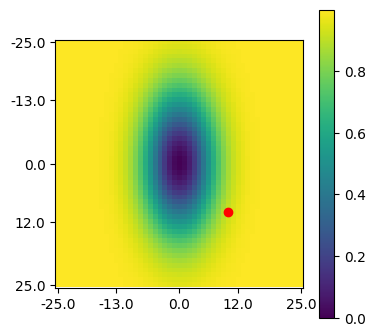

In [21]:
def gaussian_2d_wrap(pos, deriv=False, plott=False):
    """
    Wrapper for the 2D gaussian function to be used in gradient descent.
    
    Input: pos, deriv
    pos - tuple of x- and y-position of desired point in our 2D function; a.k.a. parameters of GD
    deriv - whether or not to compute and do the derivative
    
    Output: if deriv: g, dg
                else: g
    g - scalar value of gaussian function at the desired point
    dg - tuple of x- and y-derivatives of the gaussian function
    """
    
    # Create a 2D gaussian map
    l = (51, 51)
    hei = (1,1)
    shift = (0,0)
    sig = (5,10)
    
    # Return g, dg and plot if requested
    return gaussian_2d(l, pos, hei, shift, sig, plott=plott, deriv=deriv)


# plot the 2D gaussian map
pos0 = np.array([10,10])
lx, ly = 51, 51
g = gaussian_2d_wrap(pos0, deriv=False, plott=True)

# find min of the function with gradient descent
opt_params = { 'epsilon0':1, 'epsilon_decay':0.5, 'epsilon_jump': 2, \
              'num_its':16, 'check_freq':2, 'print_checks':True, 'Theta0':pos0, \
              'force_all_its': False, 'threshold': 0.01}
opt_pos, stats = sg.gradient_descent(gaussian_2d_wrap, opt_params)

# visualize training process
check_poss = stats['check_Thetas']
check_xs = [x + (lx - 1) / 2 for (x,y) in check_poss]
check_ys = [y + (ly - 1) / 2 for (x,y) in check_poss]

gaussian_2d_wrap(opt_pos, deriv=False, plott=True)
plt.plot(check_xs,check_ys,'r+')

In [ ]:
sg.set_Fg(F)
sg.set_drdMaux(drdMaux)
sg.set_lbls(x)

print(x)

np.random.seed(0)
B0 = 0.0001 * np.random.random_sample((C,C))

sg.display_matrix(B0, 'initial parameters')

opt_params = { 'epsilon0':1, 'epsilon_decay':0.5, 'epsilon_jump': 2, \
              'num_its':16, 'check_freq':2, 'print_checks':True, 'Theta0':B0, \
              'force_all_its': False, 'threshold': 0.001}


B, stats = sg.gradient_descent(sg.rayleigh_tr, opt_params)

sg.display_matrix(B, 'final parameters')

In [ ]:
print(x)
sg.hist_of_entries(B0, 20)
sg.hist_of_entries(B, 20)

In [ ]:
# np.random.seed(0)
# B0 = 0.0001 * np.random.random_sample((C,C))

# opt_params = { 'epsilon0':1, 'epsilon_decay':0.5, 'epsilon_jump': 2, \
#               'num_its':16, 'check_freq':2, 'print_checks':True, 'Theta0':B0, \
#               'force_all_its': False, 'threshold': 0.001}

B2, stats2 = sg.fit_graph(f.T, (x+1)//2, opt_params, seed = 0)
print(x)

In [ ]:
assert (B == B2).all()

assert stats['check_its'] == stats2['check_its']

for i in range(len(stats['check_Thetas'])):
    assert (stats['check_Thetas'][i] == stats2['check_Thetas'][i]).all()
    
for i in range(len(stats['train_losss'])):
    assert stats['train_losss'][i] == stats2['train_losss'][i]

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(stats['check_its'], stats['train_losss'], marker='o')
plt.plot(stats2['check_its'], stats2['train_losss'], marker='^')
plt.legend(['manual', 'auto'])
plt.xlabel('iteration number')
plt.ylabel('loss')
plt.title('Training loss of each iteration', fontsize=10)

plt.figure(figsize=(5,3))
plt.plot(stats['it_times'], marker='o')
plt.plot(stats2['it_times'], marker='^')
plt.legend(['manual', 'auto'])
plt.xlabel('iteration number')
plt.ylabel('time (sec)')
plt.title('Elapsed time after each iteration since the start of the algorithm', fontsize=10)


plt.figure(figsize=(5,3))
plt.plot(stats['stepsizeloop_times'], marker='o')
plt.plot(stats2['stepsizeloop_times'], marker='^')
plt.legend(['manual', 'auto'])
plt.xlabel('iteration number')
plt.ylabel('time (sec)')
_ = plt.title('Time spent to find a valid stepsize in each iteration', fontsize=10)

In [ ]:
W = sg.create_W(B)
print(W)
print(x)

In [ ]:
W_ord, origin, cats = sg.in_order(W, x)

print(W_ord)
print(origin)
print(cats)

sg.display_matrix(W_ord, 'ordered adj mat')

In [ ]:
train_des = np.arange(N*C).reshape((N,C))
train_y = np.arange(N)%2
print(train_des)
print(train_y)

Nv = 7
val_des = np.arange(Nv*C).reshape((Nv,C))
val_y = np.arange(Nv)%2
print(val_des)
print(val_y)

acc, y_est, t = sg.get_acc(B, train_des, train_y, val_des, val_y)